# Description

**Background & Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

**Objective**

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

**Data Dictionary:**

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

# Importing necessary libraries

In [90]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

#Library for statistics
import scipy.stats as stats

# Data loading

In [57]:
data = pd.read_csv("BankChurners.csv")

In [58]:
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are 21 columns and 10,127 observations in the dataset
- There are no missing values in the data set
- The data set includes both numerical and categorical variables

#### Converting object to category in order to reduce memory usage

In [59]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

#### Checking number of unique values in each column

In [7]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model.

In [60]:
# Dropping column CLIENTNUM
data.drop("CLIENTNUM", axis=1, inplace=True)

### Summary of the data

#### Numerical variables

In [9]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- `Customer_Age`: The customer's age ranges from 26 to 73 years old with an average / median age of 46 years old.
- `Dependent_count`: The number of depedent ranges from 0 to 5 with an average of 2.3 dependents per customer.
- `Month_on_book`: Customers have been with the bank for at least 13 months with some customers with the bank for up to 56 months. The average period with the bank for customers is 35.9 months.
- `Total_Relationship_Count`: The total number of products held by the customers ranges from 1 to 6 with an average of 3.8.
- `Months_Inactive_12_mon`: The number of months inactive in the last 12 months ranges from 0 to 6 months with an average of 2.3 months of inactivity.
- `Contacts_Count_12_mon`: The number of contacts in the last 12 months ranges from 0 to 6 with an average of 2.5.
- `Credit_Limit`:  The credit limit on the credit card ranges from 1,438 to 34,516 with an average of 8,632. This reflects the differences in purchasing power among customers.
- `Total_Revolving_Bal`: The total revolving balance on the credit card ranges from 0 to 2,517 with an average of 1,163.
- `Avg_Open_To_Buy`: The open to buy credit line (Average of last 12 months) ranges from 3 to 34,516 with an average of 7,469.
- `Total_Amt_Chng_Q4_Q1`: The change in transaction amount (Q4/Q1 ratio) ranges from 0 to 3.4 and with an average of 0.76 (i.e. < 1). This reflects a drop in transations between Q1 and Q4 with most customers purchasing less with their credit card.
- `Total_Trans_Amt`: The total transaction amount over the last 12 months ranges from 510 to 18,484 with an average of 4,404. This further reflects the differences in purchasing power among customers.
- `Total_Trans_Ct`: The total transaction count over the last 12 months ranges from 10 to 139 with an average of 64.9 transactions per customer within a year.
- `Total_Ct_Chng_Q4_Q1`: The change in transaction count (Q4/Q1 ratio) ranges from 0 to 3.7 with an average of 0.71 (i.e. < 1). This further reflects a drop in transations activity between Q1 and Q4 with most customers having fewer transactions.
- `Avg_Utilization_Ratio`: The average card utilization ratio ranges from 0 to 1 with an average of 0.27 indicating that rather than using their credit card, most of the time customers prefer to use alternative methods of payment.

#### Categorical variables

In [10]:
for feature in data.columns:
    if data[feature].dtype not in ['int64', 'float64']:
        print(data[feature].value_counts())
        print(40 * '-')

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


- `Attrition_Flag`: The data set is imbalanced as there are more existing customers than attrited customers. This will need to be taken into account when predicting attrited customers.
- `Gender`: There are slightly more female customers than male customers.
- `Education_Level`: Education level of customers is split into seven categories: unknown, uneducated, high school, college, graduate, post-graduate, doctorate
- `Marital_status`: Marital status is split into four categories: married, single, unknown, divorced. Most customers are either married or single.
- `Income_Category`: Income category is split into six categories: unknown, less than 40K, 40K - 60K, 60K - 80K, 80K - 120K, 120K+ with most customers earning less than 40K USD.
- `Card_Category`: Card category is split into four categories: blue, silver, gold, platinum. Most customers own a blue card.

# EDA

## Univariate analysis

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, data=data, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, data=data, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, data=data, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color='black', linestyle='-') # Add median to the histogram

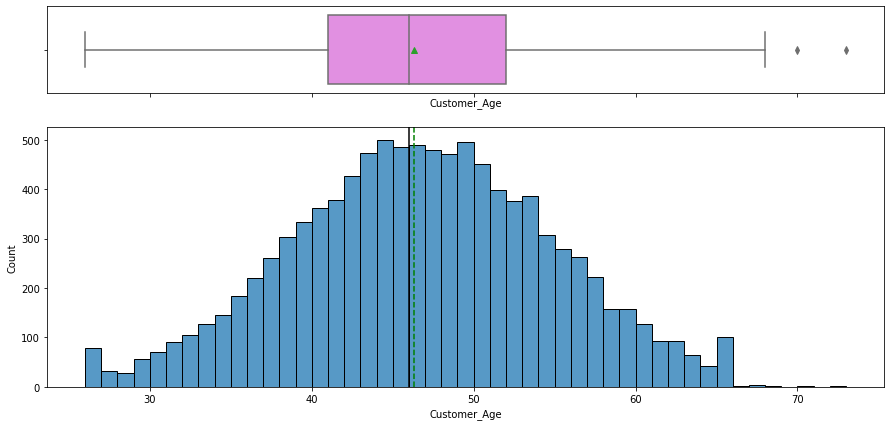

In [12]:
# Observations on Customer_age
histogram_boxplot("Customer_Age")

* Although the plot seems to indicate some outliers to the right of the distribution, these are not real outliers and we will not treat them.
* The customer's age ranges from 26 to 73 years old with an average / median age of 46 years old.

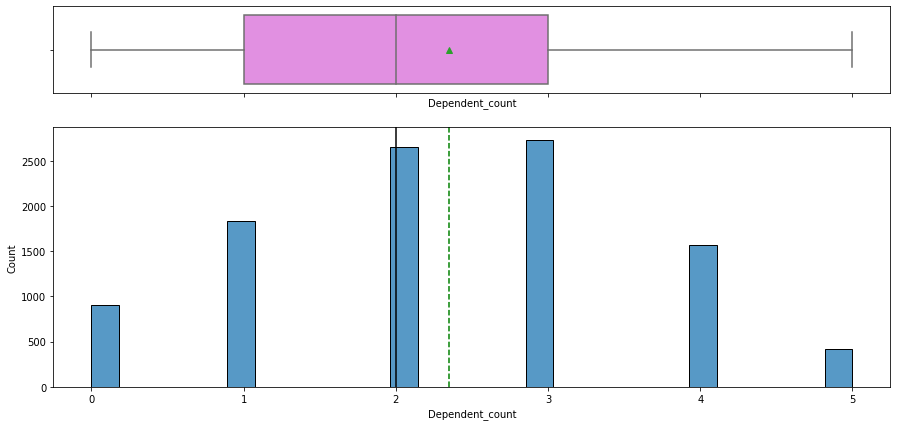

In [13]:
# Observations on dependent count
histogram_boxplot("Dependent_count")

* The number of dependent follows a normal distribution. 
* It ranges from 0 to 5 with an average of 2.3 dependents per customer.

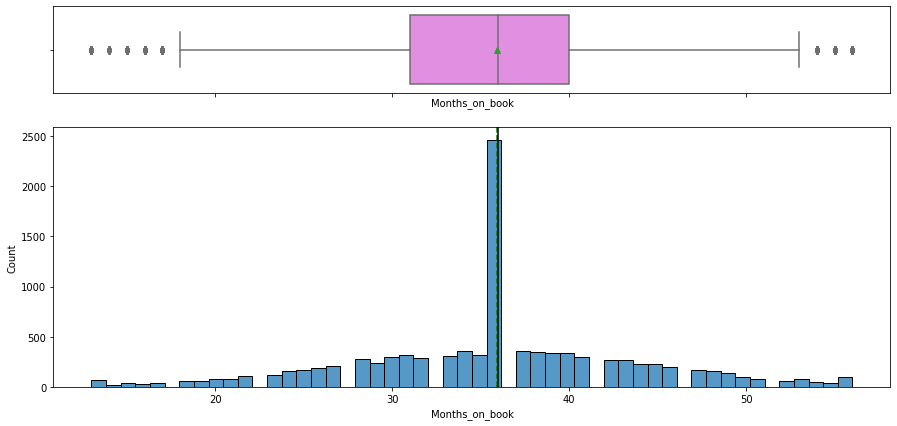

In [14]:
# Observations on months on book
histogram_boxplot("Months_on_book")

The distribution of months on book seems normal except for the following points:

* There is an unusal high proportion of customers being with the bank for 36 months (2,463 customers).
* The ends of the distribution (min and max values) have higher counts.

This seems to reflect prior treatment of missing values (using median value) and outliers (capping extreme values to a minimum or maximum)

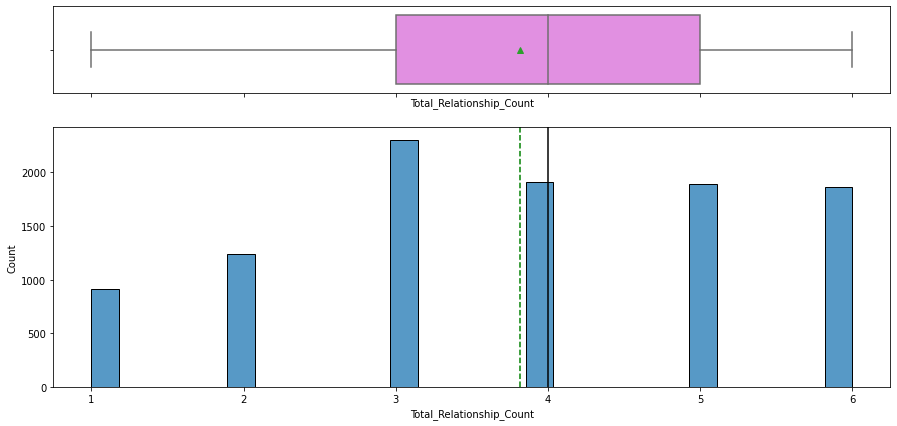

In [15]:
# Observations on total relationship counts
histogram_boxplot("Total_Relationship_Count")

* The total number of products held by the customers ranges from 1 to 6 with most customers holding 3 products.

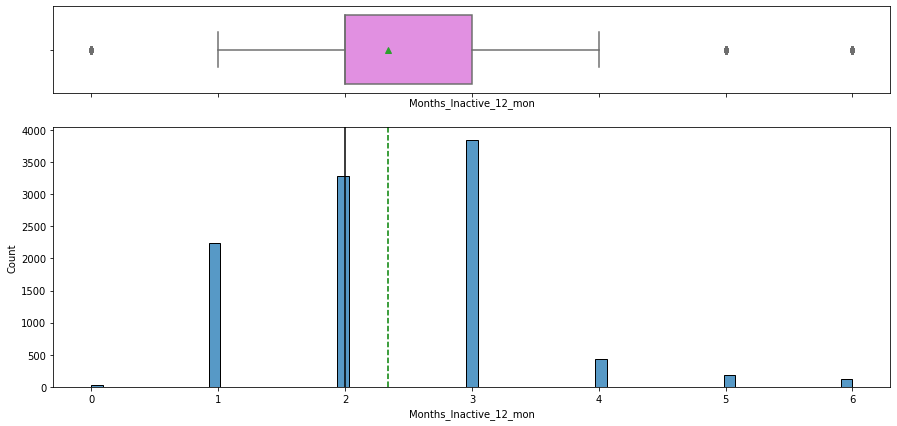

In [16]:
# Observations on months inactivity over last 12 months
histogram_boxplot("Months_Inactive_12_mon")

* The number of months of inactivity in the last 12 months ranges from 0 to 6 months with an average of 2.3 months of inactivity
* Although the plot seems to indicate some outliers, these are not real outliers and we will not treat them.

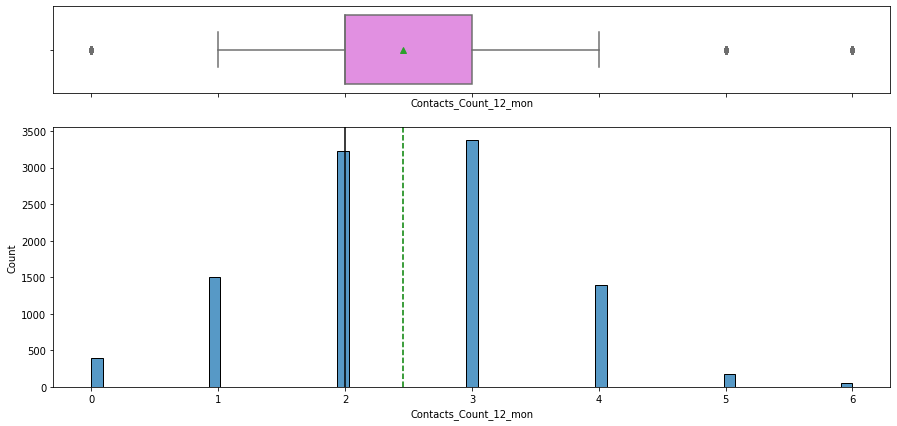

In [17]:
# Observations on contacts count
histogram_boxplot("Contacts_Count_12_mon")

* The number of contacts in the last 12 months ranges from 0 to 6 with an average of 2.5.
* Although the plot seems to indicate some outliers, these are not real outliers and we will not treat them.

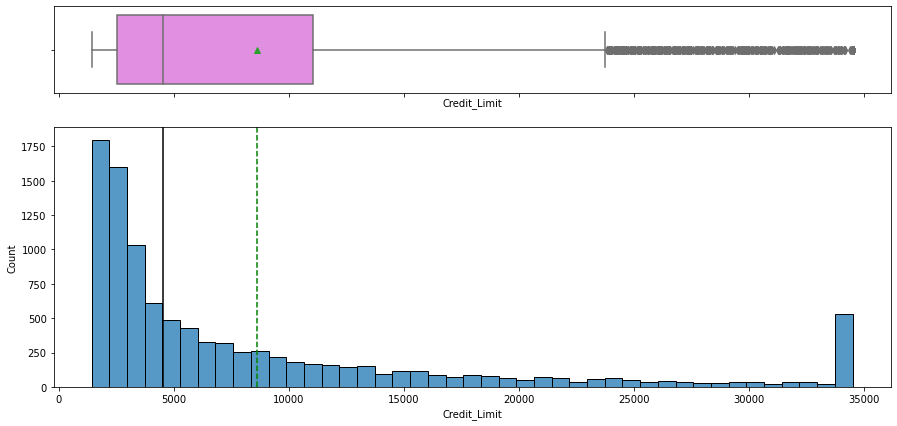

In [18]:
# Observations on credit limit
histogram_boxplot("Credit_Limit")

* The credit limit on the credit card ranges from 1,438 to 34,516 with an average of 8,632 and a median of 4,549.
* This is a right skewed distribution.
* The number of customers having a credit limit of 34,516 is excessively high. This could indicate prior outliers treatment with extreme values being capped to a maximum.

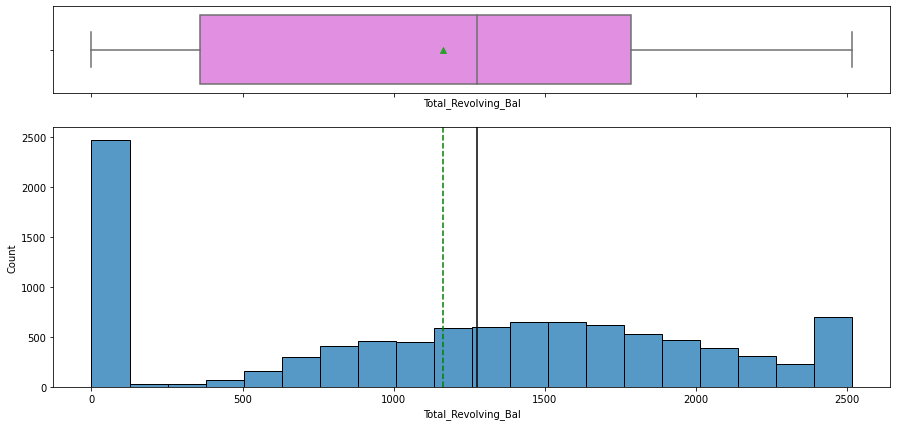

In [19]:
# Observations on total revolving balance
histogram_boxplot("Total_Revolving_Bal")

* The total revolving balance on the credit card ranges from 0 to 2,517 with an average of 1,163 and a median of 1,276.
* It is close a normal distribution except for the end points (0 and 2,517) where number of customers is higher.

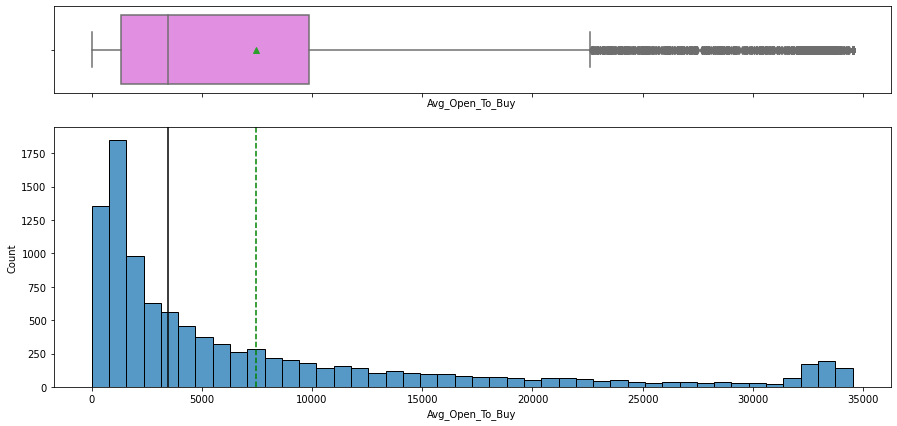

In [20]:
# Observations on open to buy credit line
histogram_boxplot("Avg_Open_To_Buy")

* The open to buy credit line (Average of last 12 months) ranges from 3 to 34,516 with an average of 7,469 and median of 3,474.
* It follows a right skewed distribution.
* Although the plot seems to indicate some outliers, these are not real outliers and we will not treat them.

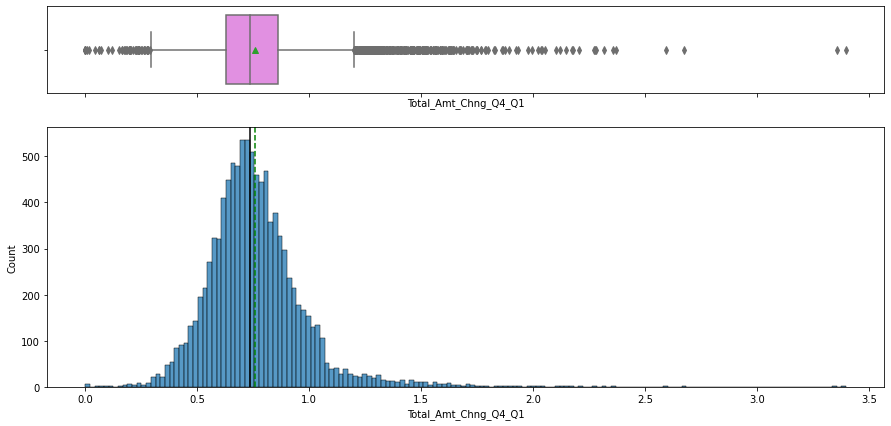

In [21]:
# Observations on change in transaction amount
histogram_boxplot("Total_Amt_Chng_Q4_Q1")

In [22]:
print("Amount of customers purchasing less in Q4 than in Q1: {:.1f}%".format(len(data[data["Total_Amt_Chng_Q4_Q1"] < 1]) / len(data) * 100))

Amount of customers purchasing less in Q4 than in Q1: 90.1%


* The change in transaction amount (Q4/Q1 ratio) ranges from 0 to 3.4 and with an average of 0.76 being less than one. 
* This reflects a drop in transactions between Q1 and Q4 with about 90% of customers purchasing less with their credit card.
* The distribution is very close to a normal.
* Although the plot seems to indicate some outliers on the right side, these are not real outliers and we will not treat them.

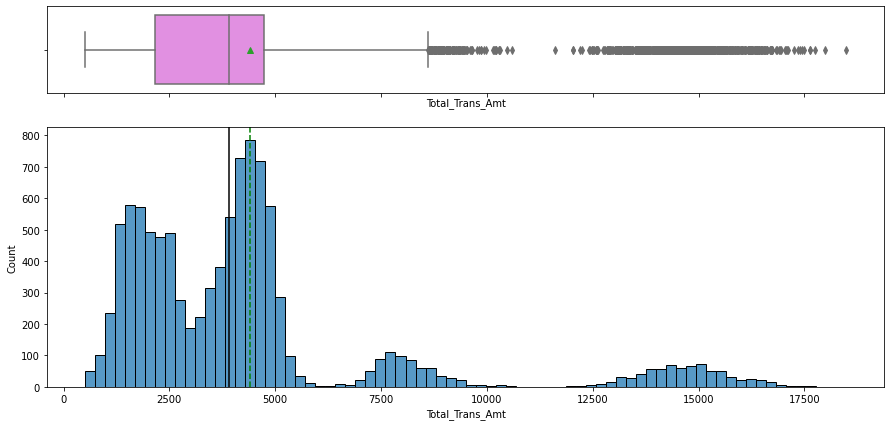

In [23]:
# Observations on total transaction amount
histogram_boxplot("Total_Trans_Amt")

* The total transaction amount over the last 12 months follows a right skewed distribution.
* It ranges from 510 to 18,484 with an average of 4,404 and a median of 3,899.
* This reflects the differences in purchasing power among customers.
* Although the plot seems to indicate some outliers on the right side, these are not real outliers and we will not treat them.

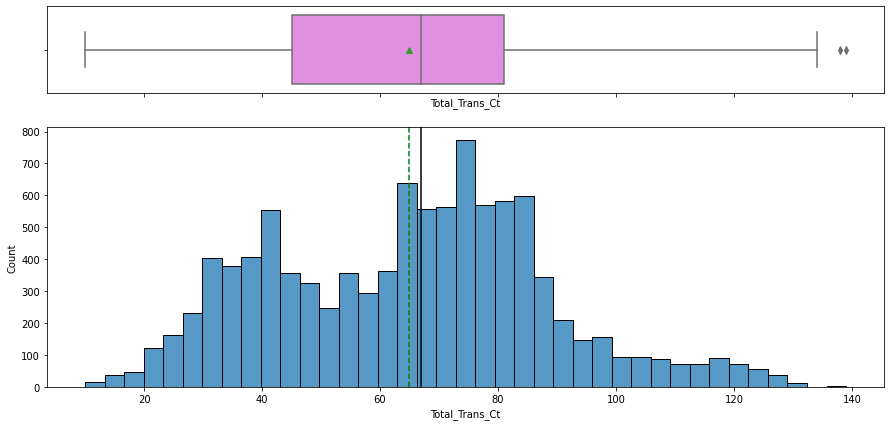

In [24]:
# Observations on total transaction count
histogram_boxplot("Total_Trans_Ct")

* The total transaction count over the last 12 months ranges from 10 to 139 with an average of 64.9 transactions per customer within a year.
* It is close to a normal distribution.
* Although the plot seems to indicate some outliers on the right end, these are not real outliers and we will not treat them.

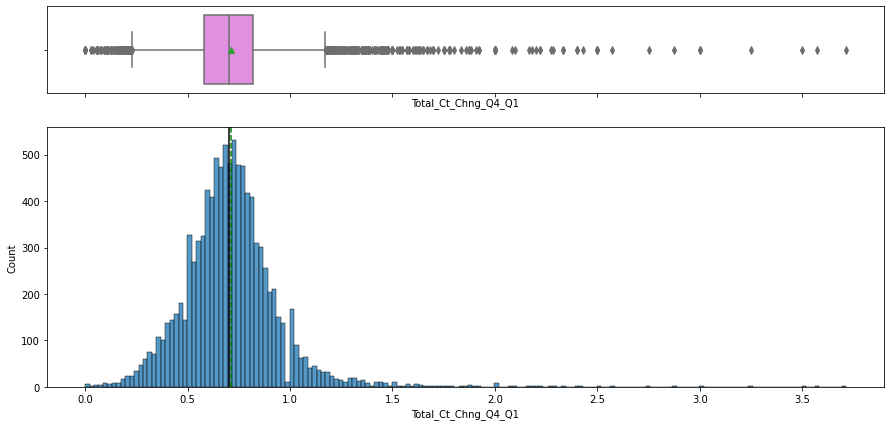

In [25]:
# Observations on change in transaction counts
histogram_boxplot("Total_Ct_Chng_Q4_Q1")

In [26]:
print("Amount of customers making fewer transactions in Q4 than in Q1: {:.1f}%".format(len(data[data["Total_Ct_Chng_Q4_Q1"] < 1]) / len(data) * 100))

Amount of customers making fewer transactions in Q4 than in Q1: 91.8%


* The change in transaction counts (Q4/Q1 ratio) ranges from 0 to 3.7 with an average of 0.71. 
* This further reflects a drop in transactions between Q1 and Q4 with about 91.8 % of customers making fewer transactions with their credit card.
* The distribution is very close to a normal.
* Although the plot seems to indicate some outliers on the right side, these are not real outliers and we will not treat them.

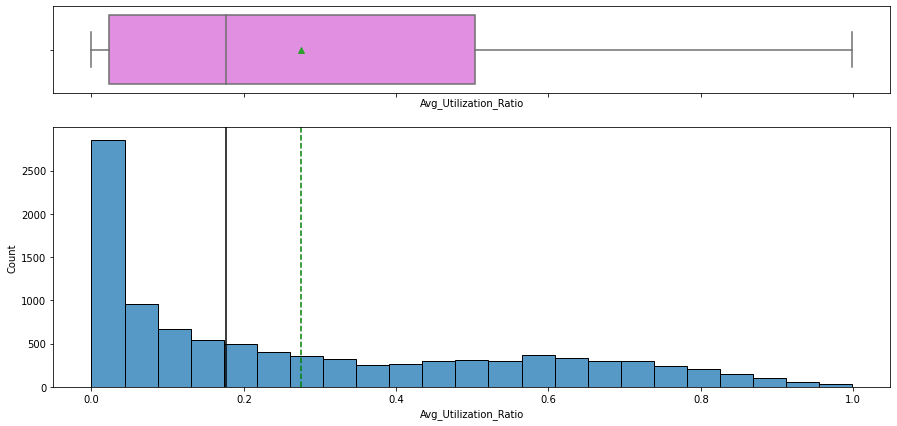

In [27]:
# Observations on average utilization ratio
histogram_boxplot("Avg_Utilization_Ratio")

In [28]:
print("Amount of customers not using their credit card: {:.1f}%".format(len(data[data["Avg_Utilization_Ratio"] == 0]) / len(data) * 100))

Amount of customers not using their credit card: 24.4%


* The average card utilization ratio follows a right skewed distribution.
* It ranges from 0 to 1 with an average ratio of 0.27 indicating that rather than using their credit card, most of the time customers prefer to use alternative methods of payment.
* About 24.4 % of customers never use their credit card.

In [29]:
def perc_on_bar(feature, figsize=(10,5)):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(data[feature]) # length of the column
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=feature, data=data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - .05 # width of the plot
        y = p.get_height() + 30         # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show()

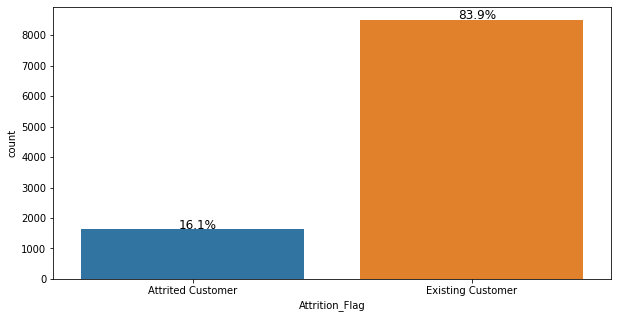

In [30]:
# Observations on attrition
perc_on_bar('Attrition_Flag')

* The data set is imbalanced as there are more existing customers than attrited customers (83.9% vs 16.1%). 
* This will need to be taken into account when predicting attrited customers.

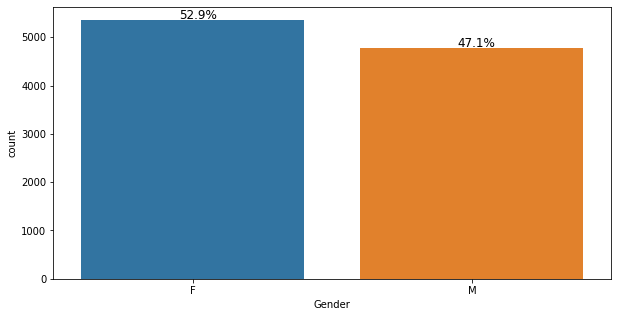

In [31]:
# Observations on gender
perc_on_bar('Gender')

* There is slightly more female customers than male customers: 52.9% vs 47.1%.

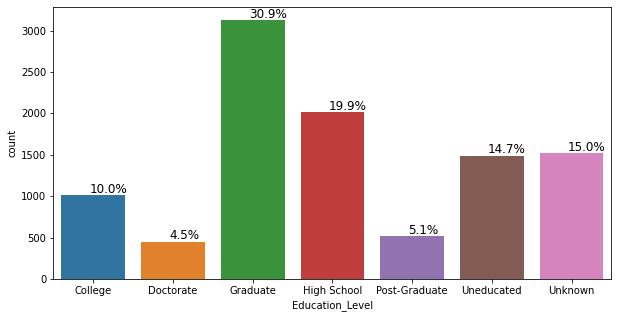

In [32]:
# Observations on education level
perc_on_bar('Education_Level')

* 30.9 % of customers are graduate

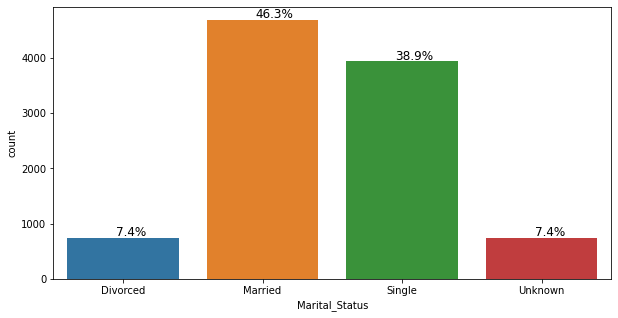

In [33]:
# Observations on marital status
perc_on_bar('Marital_Status')

* Most customers are either married or single.

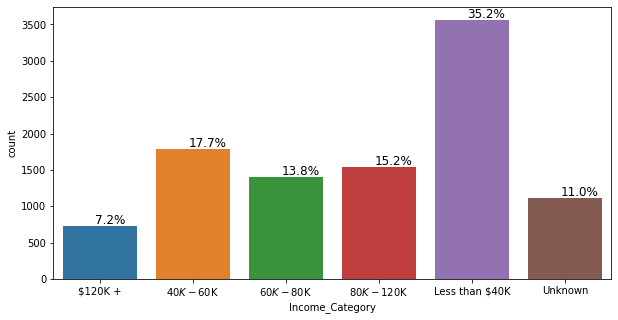

In [34]:
# Observations on income category
perc_on_bar('Income_Category')

* 35.2% of customers earn less than 40,000 USD p.a.

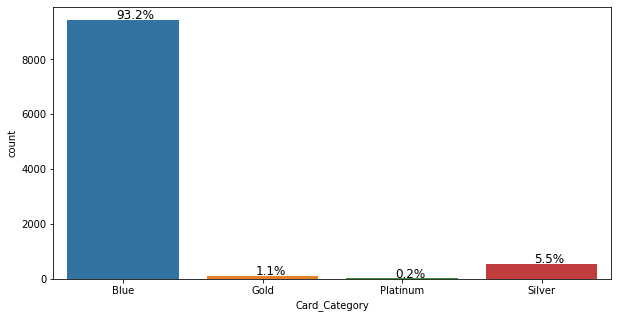

In [35]:
# Observations on card category
perc_on_bar('Card_Category')

* 93.2% of customers own a blue card.

## Bivariate analysis

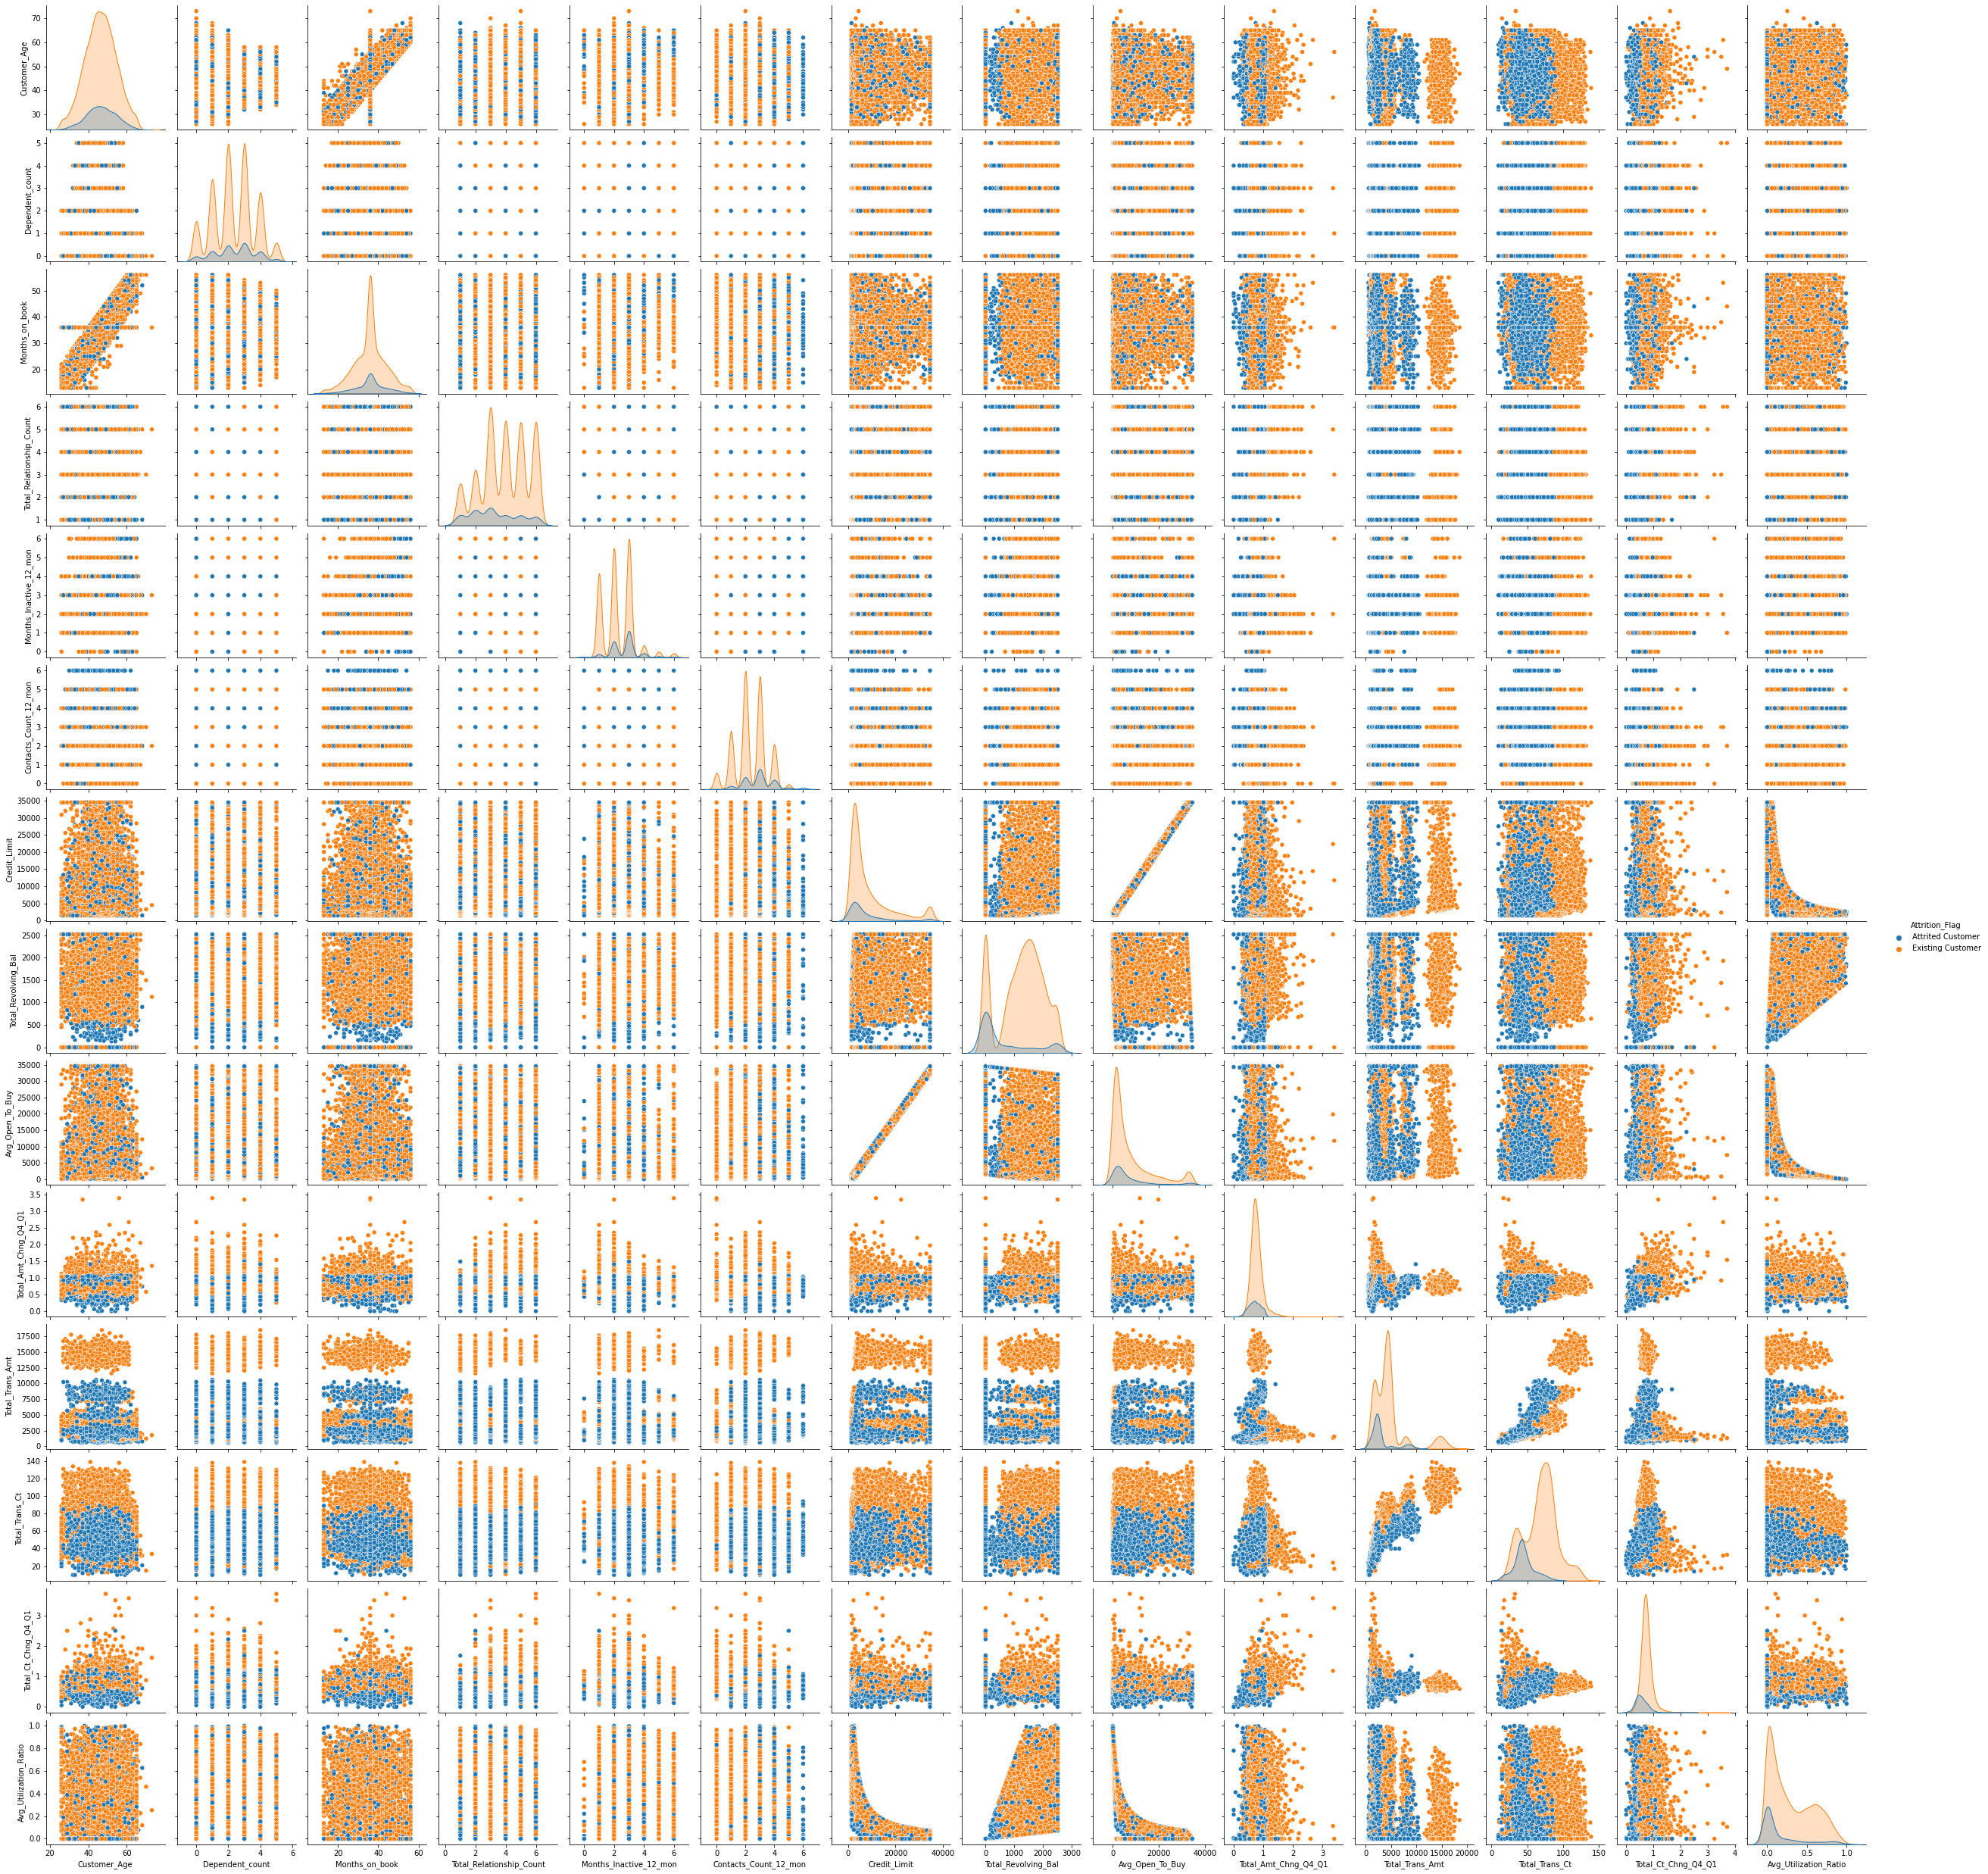

In [36]:
sns.pairplot(data, hue="Attrition_Flag");

In [37]:
data.groupby('Attrition_Flag').mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                     
Attrited Customer     46.659496         2.402581       36.178242   
Existing Customer     46.262118         2.335412       35.880588   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                  3.279656                2.693301   
Existing Customer                  3.914588                2.273765   

                   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
Attrited Customer               2.972342   8136.039459           672.822987   
Existing Customer               2.356353   8726.877518          1256.604118   

                   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                              
Attrited Customer      7463.216472              0.694277      3095.025814   
Existing Customer      7470.273400              0.772510      4654.655882   

                   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                                 
Attrited Customer       44.933620             0.554386               0.162475  
Existing Customer       68.672588             0.742434               0.296412

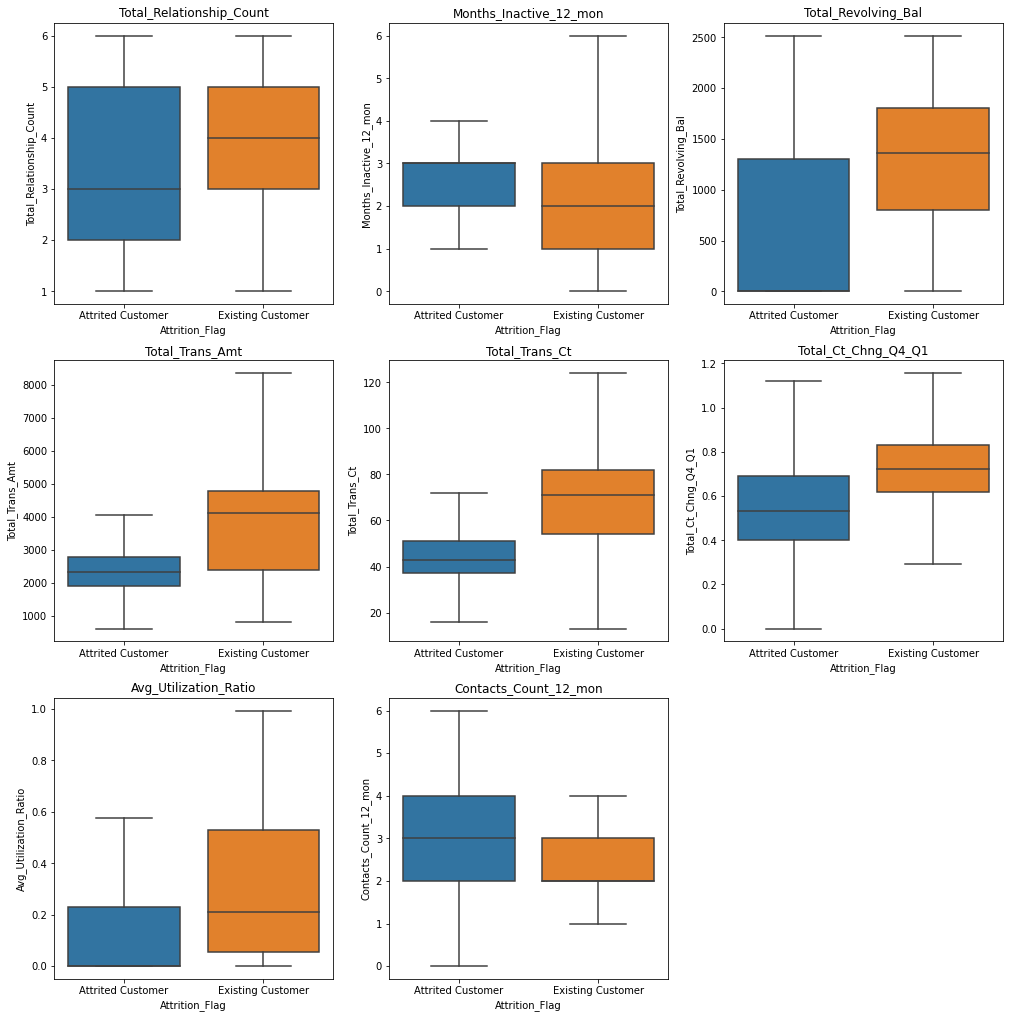

In [38]:
cols = ['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Total_Revolving_Bal',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Contacts_Count_12_mon']

plt.figure(figsize=(17,30))

for i, variable in enumerate(cols):
                     plt.subplot(5,3,i+1)
                     sns.boxplot(x='Attrition_Flag', y=variable, data=data, showfliers=False)
                     plt.title(variable)
plt.show()

Compared to exisiting customers, attrited customers tend to: 
* hold a lower number of products
* stay inactive for a longer period
* have a lower revolving balance
* spend less on credit card
* make fewer transactions with their credit card
* have a bigger drop in transactions count between Q1 and Q4.
* have a lower average utilization ratio
* have more contacts with the bank

In [39]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x, figsize=(10, 5)):
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=figsize)
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


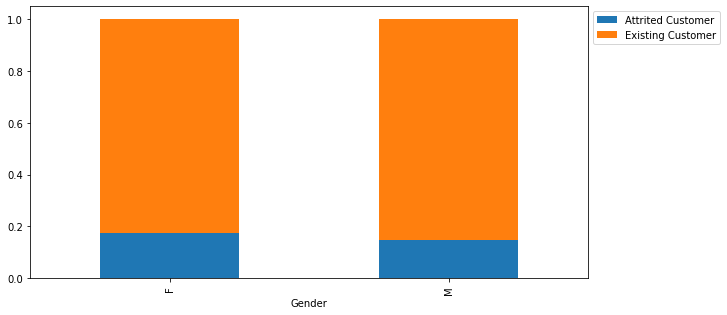

In [40]:
stacked_plot(data["Gender"])

In [61]:
# Converting Attrition_flag to numerical variable for t-test
attrition = {'Existing Customer':0, 'Attrited Customer':1}
data['Attrition_Flag']=data['Attrition_Flag'].map(attrition)
data['Attrition_Flag']=data['Attrition_Flag'].astype('int')

In [42]:
# T-test to check dependency of attrition on gender
Ho = "Gender has no effect on attrition rate"   # Stating the Null Hypothesis
Ha = "Gender has an effect on attrition rate"   # Stating the Alternate Hypothesis

x = np.array(data[data['Gender'] == 'M'].Attrition_Flag)  # Selecting attrition values corresponding to males as an array
y = np.array(data[data['Gender'] == 'F'].Attrition_Flag) # Selecting attrition values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value: {p_value.round(4)} < 0.05')
else:
    print(f'{Ho} as the p_value: {p_value.round(4)} > 0.05')

Gender has an effect on attrition rate as the p_value: 0.0002 < 0.05


* The attrition rate is higher among female customers.

Attrition_Flag      0     1    All
Education_Level                   
College           859   154   1013
Doctorate         356    95    451
Graduate         2641   487   3128
High School      1707   306   2013
Post-Graduate     424    92    516
Uneducated       1250   237   1487
Unknown          1263   256   1519
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


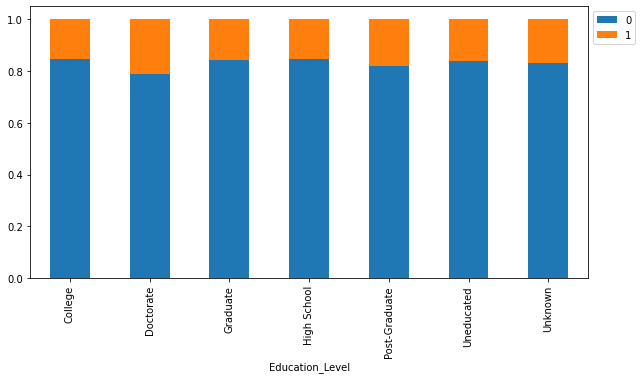

In [43]:
stacked_plot(data["Education_Level"])

* The attrition rate is higher among highly educated people with post-graduate and doctorate.

Attrition_Flag     0     1    All
Marital_Status                   
Divorced         627   121    748
Married         3978   709   4687
Single          3275   668   3943
Unknown          620   129    749
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


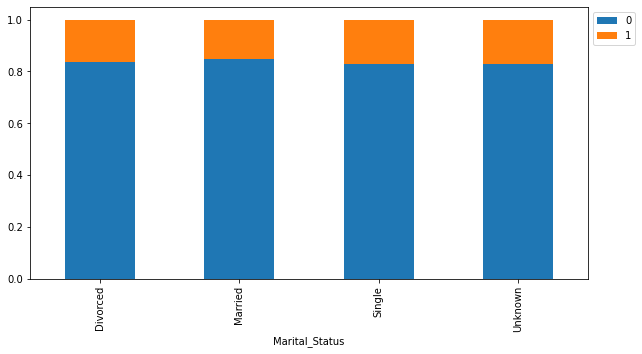

In [44]:
stacked_plot(data["Marital_Status"])

In [45]:
# Test to see if attrition rate for customers having different marital status is significantly different

Ho = "Marital status has no effect on attrition rate"   # Stating the Null Hypothesis
Ha = "Marital status has an effect on attrition rate"   # Stating the Alternate Hypothesis

divorced = data[data['Marital_Status'] == 'Divorced']['Attrition_Flag']
married = data[data['Marital_Status'] == 'Married']['Attrition_Flag']
single = data[data['Marital_Status'] == 'Single']['Attrition_Flag']
unknown = data[data['Marital_Status'] == 'Unknown']['Attrition_Flag']

f_stat, p_value = stats.f_oneway(divorced,married,single,unknown)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value: {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value: {p_value.round(2)} > 0.05')

Marital status has no effect on attrition rate as the p_value: 0.11 > 0.05


* Marital status does not seem to impact the attrition rate significantly

Attrition_Flag      0     1    All
Income_Category                   
$120K +           601   126    727
$40K - $60K      1519   271   1790
$60K - $80K      1213   189   1402
$80K - $120K     1293   242   1535
Less than $40K   2949   612   3561
Unknown           925   187   1112
All              8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


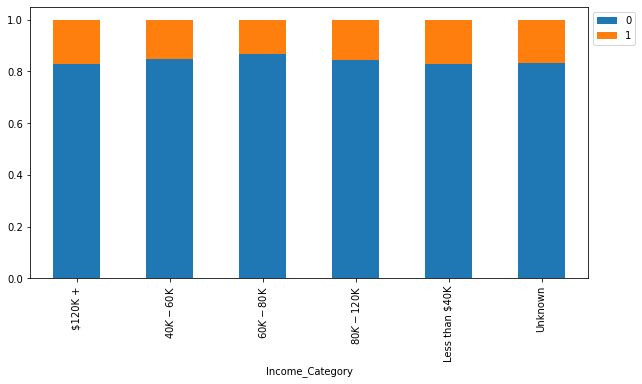

In [46]:
stacked_plot(data["Income_Category"])

In [47]:
# Test to see if attrition rate for customers having different income category is significantly different

Ho = "Income category has no effect on attrition rate"   # Stating the Null Hypothesis
Ha = "Income category  has an effect on attrition rate"   # Stating the Alternate Hypothesis

IC_40 = data[data['Income_Category'] == 'Less than $40K']['Attrition_Flag']
IC_40_60 = data[data['Income_Category'] == '$40K - $60K']['Attrition_Flag']
IC_60_80 = data[data['Income_Category'] == '$60K - $80K']['Attrition_Flag']
IC_80_120 = data[data['Income_Category'] == '$80K - $120K']['Attrition_Flag']
IC_120 = data[data['Income_Category'] == '$120K +']['Attrition_Flag']
IC_unknown = data[data['Income_Category'] == 'Unknown']['Attrition_Flag']

f_stat, p_value = stats.f_oneway(IC_40,IC_40_60,IC_60_80,IC_80_120,IC_120,IC_unknown)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value: {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value: {p_value.round(2)} > 0.05')

Income category  has an effect on attrition rate as the p_value: 0.025 < 0.05


* Income has a limited effect on attrition rate.
* People earning less than 40k USD p.a. tend to have a higher attrition rate.

Attrition_Flag     0     1    All
Card_Category                    
Blue            7917  1519   9436
Gold              95    21    116
Platinum          15     5     20
Silver           473    82    555
All             8500  1627  10127
------------------------------------------------------------------------------------------------------------------------


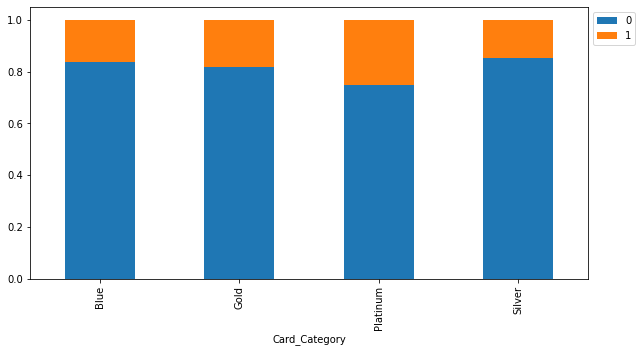

In [48]:
stacked_plot(data["Card_Category"])

In [49]:
# Test to see if attrition rate for customers having different type of credit card is significantly different

Ho = "Card category has no effect on attrition rate"   # Stating the Null Hypothesis
Ha = "Card category has an effect on attrition rate"   # Stating the Alternate Hypothesis

blue = data[data['Card_Category'] == 'Blue']['Attrition_Flag']
silver = data[data['Card_Category'] == 'Silver']['Attrition_Flag']
gold = data[data['Card_Category'] == 'Gold']['Attrition_Flag']
platinum = data[data['Card_Category'] == 'Platinum']['Attrition_Flag']

f_stat, p_value = stats.f_oneway(blue,silver,gold,platinum)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value: {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} as the p_value: {p_value.round(2)} > 0.05')

Card category has no effect on attrition rate as the p_value: 0.53 > 0.05


* Looking at the stacked plot above, one could argue that the attrition rate is higher among people with platinum cards but a z-test would reveal that there is not enough customers in this category for this difference in attrition rate to be really significant.

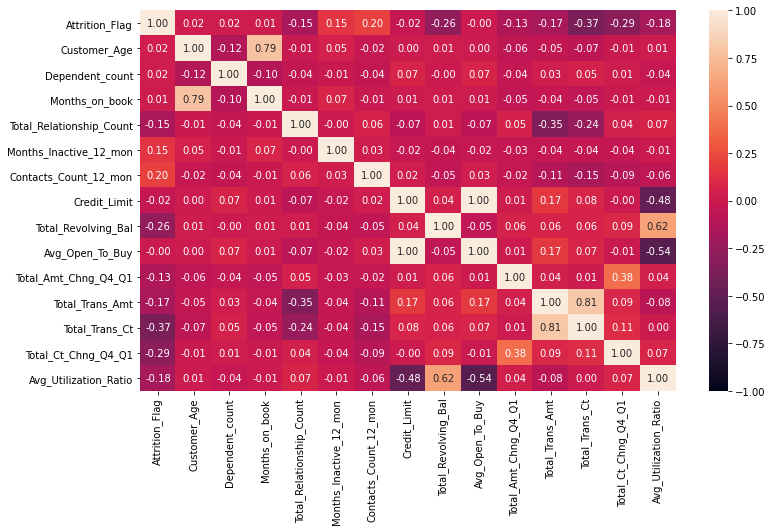

In [50]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True, fmt='.2f', vmin=-1);

* Attrition is positively correlated with inactivity and contacts count
* Attrition is negatively correlated with the transactions count, Q4/Q1 change in transaction count, revolving balance, utilization ratio, transaction amount and relationship count.

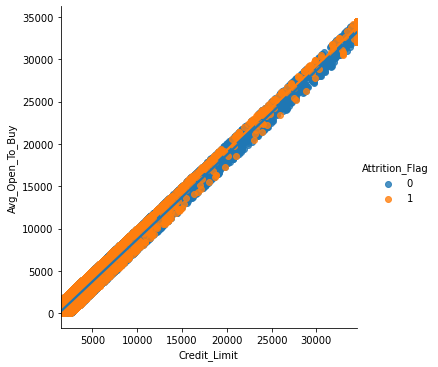

In [51]:
sns.lmplot(data=data, y='Avg_Open_To_Buy', x='Credit_Limit', hue='Attrition_Flag');

* The open to buy credit line is highly correlated with the credit limit variable. Therefore, we will have to drop one of the two variables.

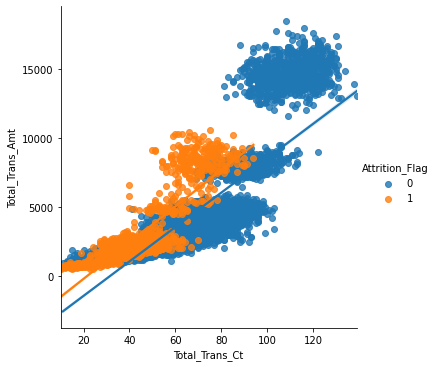

In [52]:
sns.lmplot(data=data, y='Total_Trans_Amt', x='Total_Trans_Ct', hue='Attrition_Flag');

* There is a positive correlation between the total transaction amount and the total transaction count.
* Attrited customers tend to pay a larger amount per transaction than existing customers.

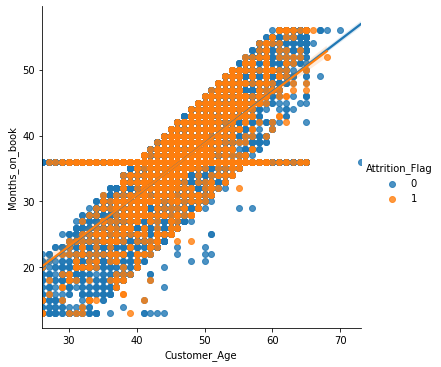

In [53]:
sns.lmplot(data=data, y='Months_on_book', x='Customer_Age', hue='Attrition_Flag');

* There is a strong correlation between the Months_on_book and the Customer_Age variable. We will have to drop one of the two variables.

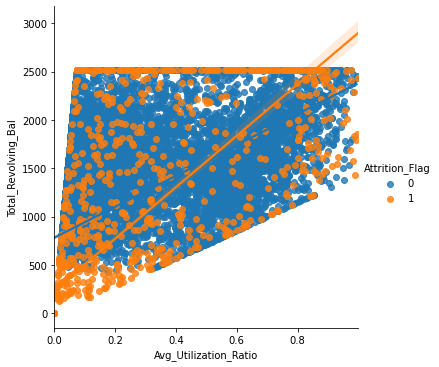

In [54]:
sns.lmplot(data=data, y='Total_Revolving_Bal', x='Avg_Utilization_Ratio', hue='Attrition_Flag');

* The revolving balance increases with the utilization ratio.
* It seems to increase faster for the attrited customers.

# Data Preparation

### Dropping redundant variables

In [62]:
data.drop(columns=['Months_on_book', 'Avg_Open_To_Buy', 'Card_Category', 'Marital_Status'], inplace=True)

### Separating target variable and other variables

In [63]:
# Separating target variable and other variables
X = data.drop('Attrition_Flag', axis=1)
y = data["Attrition_Flag"]

### Encoding categorical variables

In [64]:
X=pd.get_dummies(X, drop_first=True)

In [65]:
X.shape

(10127, 24)

After encoding, there are 24 variables

### Splitting the data into train and test sets

In [67]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(8101, 24) (2026, 24)


# Building the model

## Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will churn and the customer doesn't churn - Loss of resources
2. Predicting a customer will not churn and the customer churns - Loss of a source of income for the bank

#### Which case is more important? 
* Predicting that a customer will not churn but he churns i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [68]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [69]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic regression

In [70]:
# Logistic regression and standard scaling embedded in pipeline
lr = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(random_state=1))
])
lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=1))])

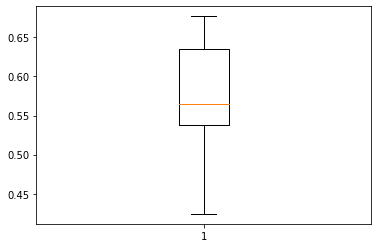

Average recall on validation set: 57.5%


In [71]:
#Using k-fold cross validation
scoring='recall'
kfold=StratifiedKFold(n_splits=20,shuffle=True,random_state=1)     #Setting number of splits equal to 20
cv_result_lr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_lr)
plt.show()

print("Average recall on validation set: {:.1f}%".format(cv_result_lr.mean() * 100))

Accuracy on training set :  0.9051968892729293
Accuracy on test set :  0.9047384007897334
Recall on training set :  0.5821812596006144
Recall on test set :  0.5876923076923077
Precision on training set :  0.7718940936863544
Precision on test set :  0.764


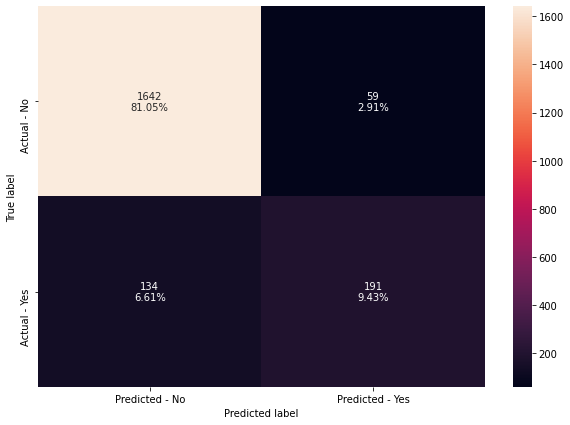

In [72]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Recall on test set is decent with 58.8%

### Undersampling train data

In [73]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [74]:
print("Before Under Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label '1': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label '0': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label '1': 1302
Before Under Sampling, counts of label '0': 6799 

After Under Sampling, counts of label '1': 1302
After Under Sampling, counts of label '0': 1302 

After Under Sampling, the shape of train_X: (2604, 24)
After Under Sampling, the shape of train_y: (2604,) 



### Logistic regression on under-sampled data

In [75]:
lr_under = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(random_state=1))
])
lr_under.fit(X_train_un, y_train_un)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=1))])

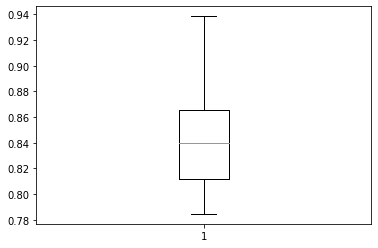

Average recall on validation set: 84.6%


In [76]:
#Using k-fold cross validation
scoring='recall'
kfold=StratifiedKFold(n_splits=20,shuffle=True,random_state=1)     #Setting number of splits equal to 20
cv_result_lr_under=cross_val_score(estimator=lr_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_lr_under)
plt.show()

print("Average recall on validation set: {:.1f}%".format(cv_result_lr_under.mean() * 100))

Accuracy on training set :  0.8529185867895546
Accuracy on test set :  0.8321816386969397
Recall on training set :  0.8494623655913979
Recall on test set :  0.8769230769230769
Precision on training set :  0.8553750966744006
Precision on test set :  0.48717948717948717


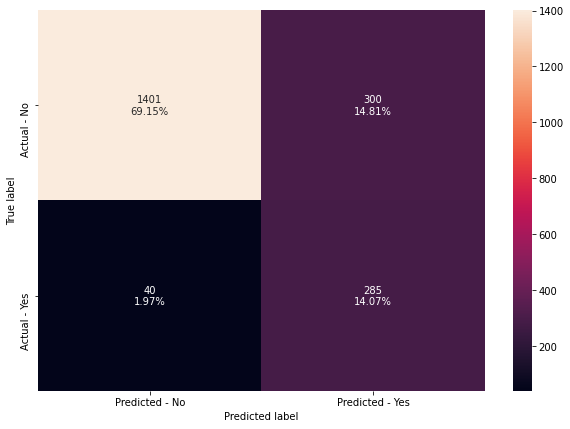

In [77]:
#Calculating different metrics
scores_LR_under = get_metrics_score(lr_under,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(lr_under,y_test)

* The under sampling technique has helped increasing the recall significantly from 58.8% up to nearly 87.7%.
* It should be noted however that the precision and overall accuracy have decreased.

### Oversampling train data using SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label '1': 1302
Before UpSampling, counts of label '0': 6799 

After UpSampling, counts of label '1': 6799
After UpSampling, counts of label '0': 6799 

After UpSampling, the shape of train_X: (13598, 24)
After UpSampling, the shape of train_y: (13598,) 



### Logistic regression on over-sampled data

In [80]:
lr_over = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(random_state=1))
])
lr_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=1))])

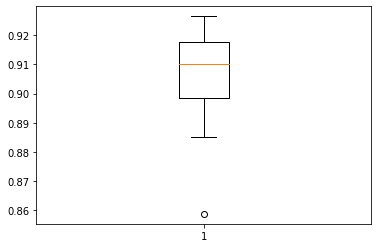

Average recall on validation set: 90.6%


In [81]:
#Using k-fold cross validation
scoring='recall'
kfold=StratifiedKFold(n_splits=20,shuffle=True,random_state=1)     #Setting number of splits equal to 20
cv_result_lr_over=cross_val_score(estimator=lr_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_lr_over)
plt.show()

print("Average recall on validation set: {:.1f}%".format(cv_result_lr_over.mean() * 100))

Accuracy on training set :  0.9133696131784086
Accuracy on test set :  0.8840078973346496
Recall on training set :  0.9077805559641123
Recall on test set :  0.7107692307692308
Precision on training set :  0.9180425405325003
Precision on test set :  0.6209677419354839


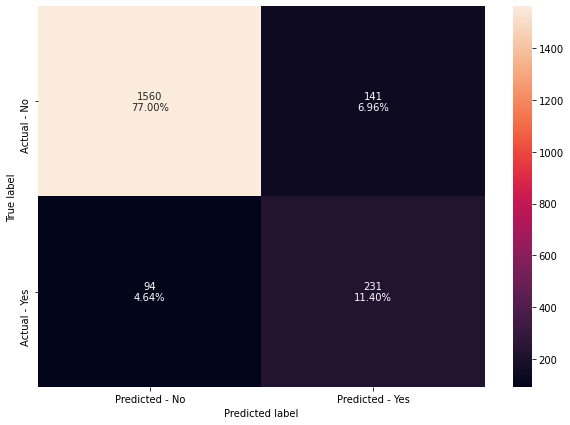

In [82]:
#Calculating different metrics
scores_LR_over = get_metrics_score(lr_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_over,y_test)

* Performance on the training set improved but the model is not able to replicate the same for the test set.
* Model is overfitting.
* Lets try regularization to see if overfitting can be reduced

### Regularization

In [83]:
%%time 

# Choose the type of classifier. 
lr_reg = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(random_state=1,solver='saga'))
])

# Grid of parameters to choose from
parameters = {'log_reg__C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=lr_reg, param_grid=parameters, scoring=scorer, cv=10)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

# Set the clf to the best combination of parameters
lr_reg = grid_cv.best_estimator_

# Fit the best algorithm to the data. 
lr_reg.fit(X_train_over, y_train_over)

Best Parameters:{'log_reg__C': 1} 
Score: 0.8954348956077277
Wall time: 9.67 s


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=1, random_state=1, solver='saga'))])

Accuracy on training set :  0.9133696131784086
Accuracy on test set :  0.8840078973346496
Recall on training set :  0.9077805559641123
Recall on test set :  0.7107692307692308
Precision on training set :  0.9180425405325003
Precision on test set :  0.6209677419354839


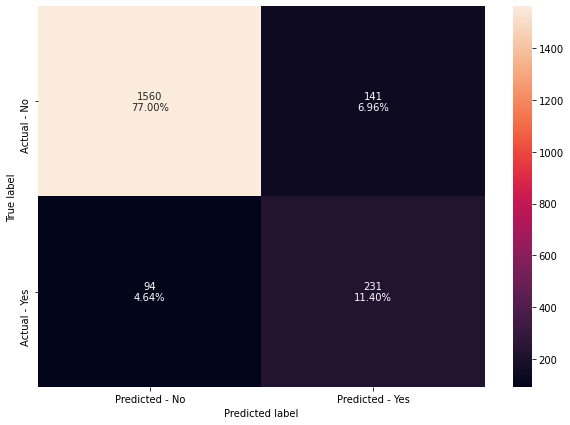

In [84]:
#Calculating different metrics
get_metrics_score(lr_reg,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_reg,y_test)

* Regularization does not help reducing overfitting and improving the model's performance

# Bagging and Boosting

In [103]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(class_weight='balanced', random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(class_weight='balanced', random_state=1)),
            ]
        ),
    )
)
 
models.append(
    (
        "BAG_DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_decision_tree", BaggingClassifier(DecisionTreeClassifier(class_weight='balanced', random_state=1), 
                                                           random_state=1))
            ]
        ),
    )
)

models.append(
    (
        "BAG_LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_logistic_reg", BaggingClassifier(LogisticRegression(class_weight='balanced', max_iter=1000), 
                                                           random_state=1))
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=40, shuffle=True, random_state=1
    )  # Setting number of splits equal to 40
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 77.90482954545455
RF: 75.60606060606061
BAG_DTREE: 79.24005681818181
BAG_LR: 83.7784090909091
GBM: 83.46827651515152
ADB: 82.5378787878788
XGB: 87.9095643939394


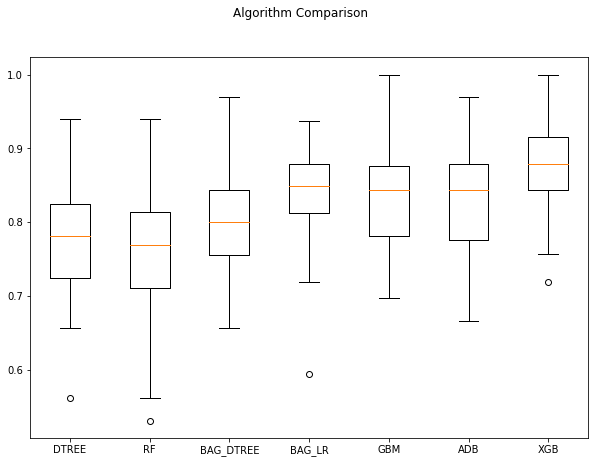

In [104]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross validated recall with 87.9% followed by the bagging classifier with logistic regression with 83.8%.
- The box blot shows outliers for the decision tree, random forest, bagging logistic regression and XGBoost algortihms.

# Hyperparameter tuning

## Decision tree

### Grid search

In [97]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1, class_weight='balanced'))

# Parameter grid to pass in GridSearchCV
param_grid = {'decisiontreeclassifier__max_depth': [3, 5, 7, 10, 15],
              'decisiontreeclassifier__max_leaf_nodes': [8, 32, 64, 128, 256],
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 4, 6, 8, 10],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__max_leaf_nodes': 32, 'decisiontreeclassifier__min_samples_leaf': 8} 
Score: 0.9178190391983495
Wall time: 31 s


In [98]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        class_weight='balanced',
        max_depth=7,
        max_leaf_nodes=32,
        min_samples_leaf=8,
        random_state=1,
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                                        max_leaf_nodes=32, min_samples_leaf=8,
                                        random_state=1))])

Accuracy on training set :  0.9139612393531663
Accuracy on test set :  0.8998025666337611
Recall on training set :  0.9608294930875576
Recall on test set :  0.9353846153846154
Precision on training set :  0.6594623089088034
Precision on test set :  0.6255144032921811


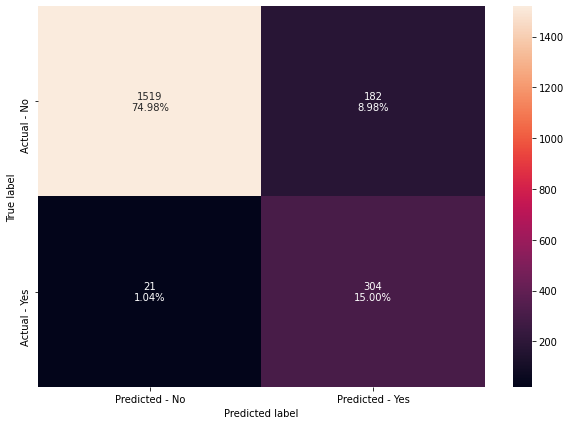

In [101]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(dtree_tuned1,y_test)

- The test recall is 93.5% (slightly more than the average cross validated recall)
- The cross validated recall has increased significantly after hyperparameter tuning.
- Grid search took 31 seconds to complete

### Random search

In [108]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1, class_weight='balanced'))

# Parameter grid to pass in GridSearchCV
param_grid = {'decisiontreeclassifier__max_depth': [3, 5, 7, 10, 15],
              'decisiontreeclassifier__max_leaf_nodes': [8, 32, 64, 128, 256],
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 4, 6, 8, 10],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
dtree_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

# Fitting parameters
dtree_tuned2.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(dtree_tuned2.best_params_, dtree_tuned2.best_score_)
)

Best Parameters:{'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__max_leaf_nodes': 32, 'decisiontreeclassifier__max_depth': 7} 
Score: 0.916280577659888
Wall time: 4.07 s


* Random search achieved similar results as grid search but was significantly faster to run 4.2 vs 31 seconds.

## XGBoost

### Grid search

In [105]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,250,50),'xgbclassifier__scale_pos_weight':[1,5,10],
            'xgbclassifier__learning_rate':[0.01,0.05,0.1], 'xgbclassifier__gamma':[0,1,5],
            'xgbclassifier__subsample':[0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.94929855585028:
Wall time: 38min 48s


In [106]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.8,
        learning_rate=0.05,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9485248734724108
Accuracy on test set :  0.9333662388943732
Recall on training set :  0.9976958525345622
Recall on test set :  0.963076923076923
Precision on training set :  0.7583187390542907
Precision on test set :  0.7178899082568807


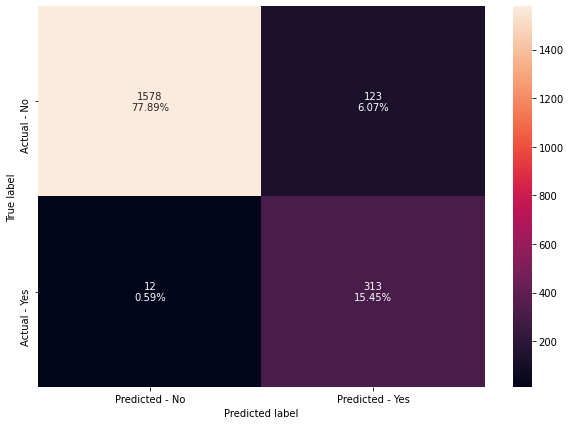

In [107]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(xgb_tuned1,y_test)

- The test recall is 96.3% (slightly more than the average cross validated recall)
- The cross validated recall has increased significantly after hyperparameter tuning.
- Grid search took more than 38 minutes to complete

### Random search

In [109]:
%%time 

# Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,250,50),'xgbclassifier__scale_pos_weight':[1,5,10],
            'xgbclassifier__learning_rate':[0.01,0.05,0.1], 'xgbclassifier__gamma':[0,1,5],
            'xgbclassifier__subsample':[0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

# Fitting parameters
xgb_tuned2.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(xgb_tuned2.best_params_, xgb_tuned2.best_score_)
)

Best Parameters:{'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 5} 
Score: 0.9400854700854702
Wall time: 2min 26s


In [110]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=100,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss'
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9256881866436243
Accuracy on test set :  0.9062191510365252
Recall on training set :  0.9907834101382489
Recall on test set :  0.9569230769230769
Precision on training set :  0.6861702127659575
Precision on test set :  0.6386036960985626


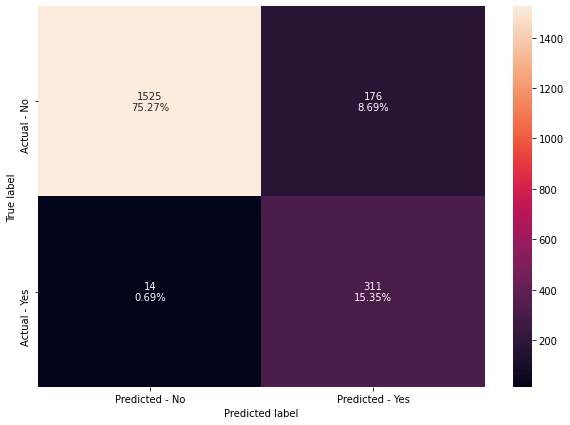

In [111]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(xgb_tuned2,y_test)

* The recall on the test set with the randomized search is just slightly less than with the grid search: 95.7% vs 96.3%
* However, the randomized search was much faster to complete: 2min 26s vs 38min 48s

# Models performance

In [112]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [113]:
# defining list of model
models = [lr_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [114]:
# defining list of models
models = [lr_over, lr_reg]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [115]:
# defining list of model
models = [dtree_tuned1, dtree_tuned2, xgb_tuned1, xgb_tuned2]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [116]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Logistic Regression on Undersampled data',
                                          'Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)',
                                          'Decision tree with grid search',
                                          'Decision tree with random search',
                                          'XGBoost with grid search',
                                          'XGBoost with random search',
                                         ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression        0.905197   
1           Logistic Regression on Undersampled data        0.852919   
2            Logistic Regression on Oversampled data        0.913370   
3  Logistic Regression-Regularized (Oversampled d...        0.913370   
4                     Decision tree with grid search        0.913961   
5                   Decision tree with random search        0.960829   
6                           XGBoost with grid search        0.948525   
7                         XGBoost with random search        0.925688   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0       0.904738      0.582181     0.587692         0.771894        0.764000  
1       0.832182      0.849462     0.876923         0.855375        0.487179  
2       0.884008      0.907781     0.710769         0.918043        0.620968  
3       0.884008      0.907781     0.710769         0.918043        0.620968  
4       0.899803      0.960829     0.935385         0.659462        0.625514  
5       0.935385      0.960829     0.935385         0.659810        0.625514  
6       0.933366      0.997696     0.963077         0.758319        0.717890  
7       0.906219      0.990783     0.956923         0.686170        0.638604

* The best performance based on test recall has been obtained using the tuned XGBoost algorithm using grid search cross validation (96.3% recall on test set).

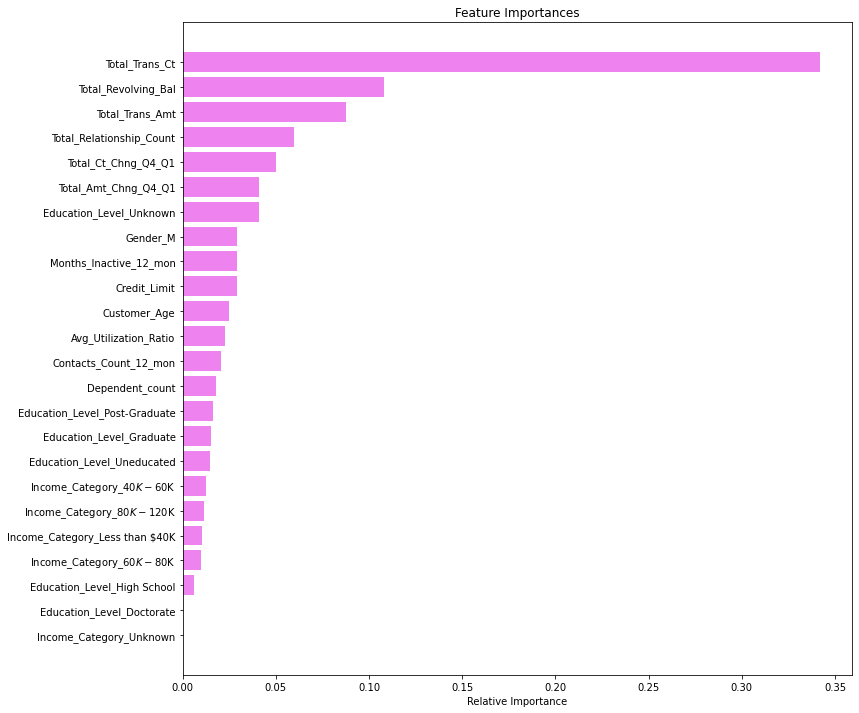

In [119]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total transaction count is the most important feature, followed by total revolving balance and total transaction amount.

# Business recommendations and insight

- The bank should target in priority customers who made fewer transactions with their credit cards in recent months, those with the lowest revolving balance and number of products as well as those who contacted the bank more frequently in recent months. These customers are most likely to churn. 
- Compared to exisiting customers, attrited customers tend to:
        - hold a lower number of products
        - stay inactive for a longer period
        - have a lower revolving balance
        - spend less on credit card
        - make fewer transactions with their credit card
        - have a bigger drop in transactions count between Q1 and Q4.
        - have a lower average utilization ratio
        - have more contacts with the bank
- The attrition rate is slightly higher among females, doctorate or customers with low income while the customer's age, marital status or card category do not seem to affect attrition rate significantly.
- 90.1% of customers purchased less with their credit cards in Q4 compared to Q1 while 91.8% of customers made fewer transactions. This is indeed a major loss of revenue for the bank.
- 24.4 % of customers never used their credit card